<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB
None


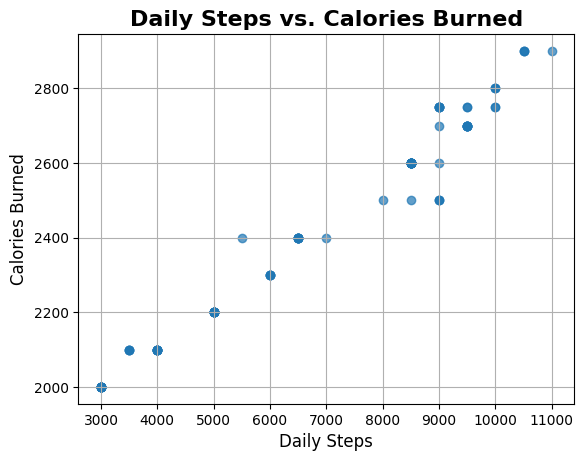

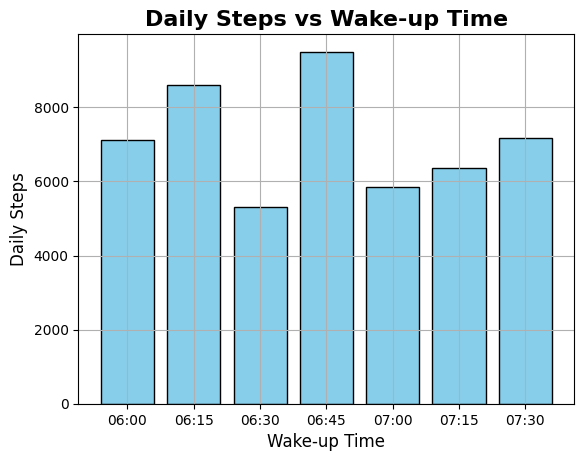

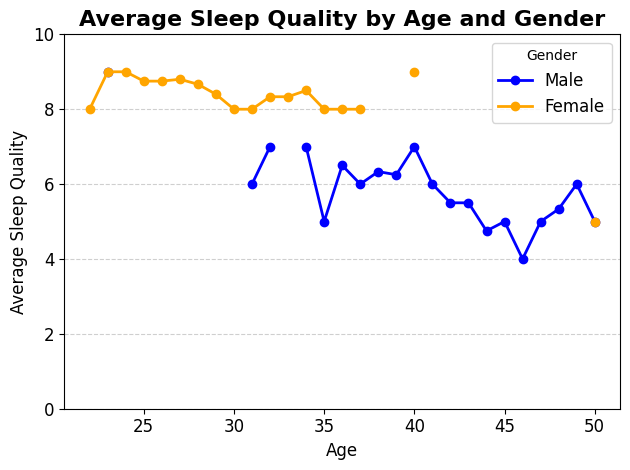

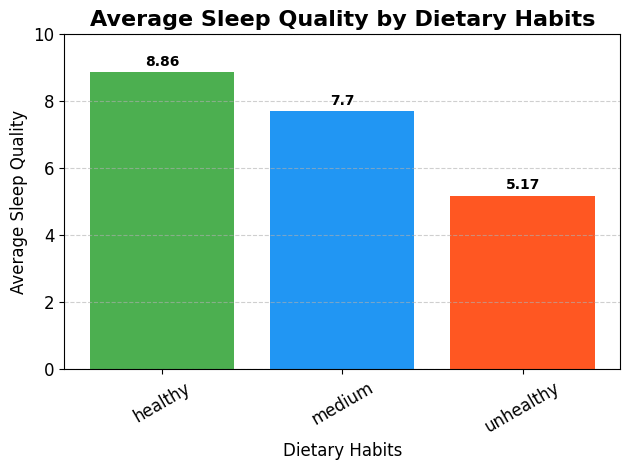

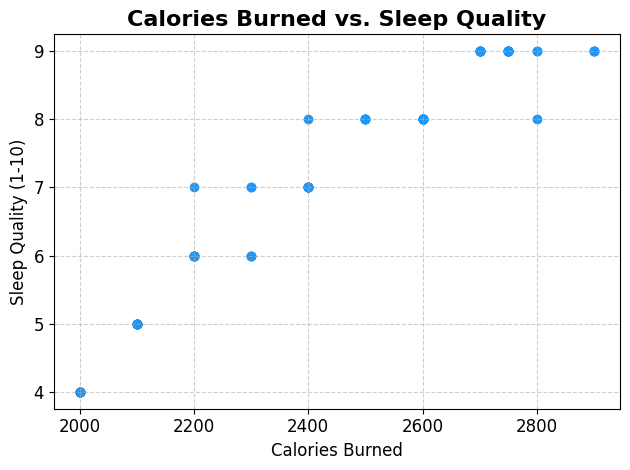

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Health_Sleep_Statistics.csv")

print(df.info())



#This graph shows how many calories people lost according to how many steps they made 
plt.scatter(df['Daily Steps'], df['Calories Burned'], alpha=0.7)
plt.title('Daily Steps vs. Calories Burned', fontsize=16, fontweight='bold')
plt.xlabel('Daily Steps', fontsize = 12)
plt.ylabel('Calories Burned', fontsize = 12)
plt.grid(True)
plt.show()


#Based on this graph we can tell that most people that wake up earlier are making more steps throughthout the day then people who wake up later
grouped_data = df.groupby('Wake-up Time')['Daily Steps'].mean()
plt.bar(grouped_data.index, grouped_data.values, color='skyblue', edgecolor='black')

plt.title('Daily Steps vs Wake-up Time', fontsize=16, fontweight='bold')
plt.xlabel('Wake-up Time', fontsize=12)
plt.ylabel('Daily Steps', fontsize=12)

plt.grid(True)
plt.show()

#In this graph we can see that women have better sleep quality than men and also that men in their later years tend to have less sleep quality
grouped_data = df.groupby(['Age', 'Gender'])['Sleep Quality'].mean().unstack()


plt.plot(grouped_data.index, grouped_data['m'], marker='o', linestyle='-', color='blue', label='Male', linewidth=2)
plt.plot(grouped_data.index, grouped_data['f'], marker='o', linestyle='-', color='orange', label='Female', linewidth=2)

plt.title('Average Sleep Quality by Age and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Sleep Quality', fontsize=12)
plt.ylim(0, 10)  


plt.legend(title='Gender', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#This graph shows us the sleep quality based on Dietary habits and we can see that the ones with healthy diets have better sleep by a narrow margin
grouped_data = df.groupby('Dietary Habits')['Sleep Quality'].mean()
plt.bar(grouped_data.index, grouped_data.values, color=['#4caf50', '#2196f3', '#ff5722'])#2196f3


plt.title('Average Sleep Quality by Dietary Habits', fontsize=16, fontweight='bold')
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Average Sleep Quality', fontsize=12)
plt.ylim(0, 10) 

for i, val in enumerate(grouped_data.values):
    plt.text(i, val + 0.2, round(val, 2), ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#this graph shows us that the more calories people burned the better sleep they had
plt.scatter(df['Calories Burned'], df['Sleep Quality'], color='#2196f3')

plt.title('Calories Burned vs. Sleep Quality', fontsize=16, fontweight='bold')
plt.xlabel('Calories Burned', fontsize=12)
plt.ylabel('Sleep Quality (1-10)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()